# Making GANs great 

GAN is typical example of high quality generative model. But we are still able to improve it. $G$ is model which maps latent distribution $p_z$ to the output $p_g$. Learning such $G$ that $p_g$ match original data distribution $p_d$ is quite complex task. In general $p_z$ is modeled by normal distribution. The reason for that is simplicity of sampling. But doing this we apply strong limitations on our model. It results in huge number of bad samples (non realistic images). To fix this problem we will correct latent distribution - decrease probability for "bad" samples and increase for "good" ones. Defining the criteria of "good" is not simple in general. So to find solution let's consider derivation for optimal discriminator:

$$D^*(x) = \frac{p_d(x)}{p_d(x) + p_g(x)}$$

Defining $d(x) = \mathrm{logit}(D(x))$ we can rewrite previous expression:

$$p_d(x) = p_g(x)\exp(d(x))$$

Since $p_g(x)$ induced by $p_z$ and $G$:

$$p^*(z) = p_z(z)\exp(d(G(z)))$$

We found the corrected distribution. Similar steps can be applied to non-standard GANs such as Wasserstein GAN (WGAN).

In this task you will be asked to improve the quality by correction of latent distribution for WGAN. An obvious question to ask is: "Why do we take WGAN?". You will answer it by yourself!

## Theoretical part (10 pts)

Suppose we have two 2D distributions: $P_\theta(x,\theta)$ and $P_*(x,\theta^*)$, where $\theta$ some parameter, $\theta^*$ is known fixed value, $x$ is random variable which has uniform distribution $x \sim U(0,1)$. In other words we have two horisontal lines in 2D space with certain $y$ position and $x$ uniformly distributed on the segment [0,1]. Find analytically distance between this distributions in different metrics for all possible values of $\theta$: 

1) KL divergence (2 pts)


Let's compute KL divergence:

$$D_{KL}(P_\theta(x,y)|| P_*(x,y)) = \int_X \int_Y P_\theta(x,y)  \log{\left(\frac{P_\theta(x,y)}{P_*(x,y)}\right)} d_{xy}$$

When $\theta \ne \theta^*$, the log tends to infinity, hence the KL divergence is $\infty$. When $\theta = \theta^*$, we get KL distance equal to 0, due to the fact that we have equal distributions and log will be equal 1.

$$D_{KL}(P_\theta(x,y)|| P_*(x,y)) = \int_X \int_Y P_\theta(x,y)  \log{\left(\frac{P_\theta(x,y)}{P_*(x,y)}\right)} d_{xy} = \int_X P_\theta(x)\log{\left(\frac{P_\theta(x)}{P_*(x)}\right)} d_{x} =\int_{0}^{1} \log{(1)} d_{x} = 0
$$


2) JS divergence (3 pts)

Let's compute JS divergence:
$JS(P_*(\theta^*)\|P_\theta(\theta)) = \frac{1}{2}\int_0^1 P_*(\theta^*) \log \frac{2 P_*(\theta^*)}{P_*(\theta^*) + P_\theta(\theta)} + 
\frac{1}{2}\int_0^1 P_\theta(\theta) \log \frac{2 P_\theta(\theta)}{P_\theta(\theta) +P_*(\theta^*)}  $

When $\theta \ne \theta^*$:

$JS(P_*(\theta^*)\|P_\theta(\theta)) = \log 2$

When $\theta = \theta^*$:

$JS(P_*(\theta^*)\|P_\theta(\theta)) = 0$

3) Wasserstein distance (3 pts)


To find the Wasserstein distance between two probability distributions, we need to
use the Wasserstein metric, also known as the Earth Mover's Distance (EMD). The EMD is defined as the minimum cost of moving the mass of one distribution to match the mass of the other distribution, where the cost is defined as the distance times the amount of mass being moved.


Then shift the unit of mass to $\|\theta-\theta^*\|$.  The Wasserstein distance will be:

$$
W\left(P_\theta, P_*\right)=\inf _{\gamma \in \Pi\left(P_\theta, P_*\right)} \mathbb{E}_{(x, y) \sim \gamma}[\|x-y\|] = \|\theta-\theta^*\|
$$

Suppose we would like to optimize parameter $\theta$ in order to fit target distribution $P_*$ with our parametrised distribution $P_\theta$. Which distance will you choose for this task? Why? (2 pts)

In general Wasserstein distance is often a better choice than KL or JS divergence when optimizing parameters for distribution fitting. Wasserstein distance is more robust than other distance measures.

## Practical part

Here you will implement WGAN-GP and train it!

In [ ]:
!pip install -q git+https://github.com/kwotsin/mimicry.git torchmetrics torch-fidelity gdown

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 29.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch_mimicry as tmim
import torchvision as tv
import gdown
from torchvision import transforms
from PIL import Image
import os
from tqdm import tqdm
from torchvision.utils import make_grid
from torchmetrics.image.fid import FrechetInceptionDistance as FID

For simplicity we will take architectures for generator and discriminator from open source library torch-mimicry (you are free to change output size of model)

In [ ]:
G = tmim.nets.wgan_gp.wgan_gp_64.WGANGPGenerator64()
D = tmim.nets.wgan_gp.wgan_gp_64.WGANGPDiscriminator64()

## Your work starts here

### The first task is to implement loss functions for WGAN-GP (8 pts)

1) Implement loss function for discriminator (1 pts)

2) Implement loss function for generator (1 pts)

3) Implement gradient penalty for discriminator optimization (6 pts)

In [ ]:
def loss_D(d_fake,d_real):
    # define the loss of discriminator based on d_fake = D(G(z)) and d_real = D(x)
    loss =  torch.mean(d_fake) - torch.mean(d_real)
    return loss

In [ ]:
def loss_G(d_fake):
    # define the loss of generator based on output_fake = D(G(z))
    loss = - torch.mean(d_fake)
    return loss

The most important moment in training WGAN-GP is gradient penalty. It is added to discriminator loss to ensure stability. Your goal is to implement following steps:

1) For given $N$ real images $x_{\mathrm{real}}$ and $N$ fake images $x_{\mathrm{fake}}$ compute random interpolation between real and fake samples in following way:

(use .detach() function over $x_{\mathrm{fake}}$ in order to get tensor without gradient graph)

$$x_{\mathrm{interpolation}} = \alpha x_{\mathrm{real}} + (1-\alpha)x_{\mathrm{fake}}$$

where $\alpha \sim U(0,1)$ (sampled from uniform distribution), $x_{\mathrm{real}}$ is of size $[N,3,H,W]$, $x_{\mathrm{fake}}$ is of size $[N,3,H,W]$ and $\alpha$ is of size $[N]$

2) Compute gradient of discriminator output with respect to input (interpolated samples)

$$\nabla D(x_{\mathrm{interpolation}})$$

It will be of size $[N,3,H,W]$, for ease of use reshape it to $[N,3HW]$

3) Compute loss:

$$\mathcal{L} = \mathrm{E}(\|\nabla D(x_{\mathrm{interpolation}})\|_2 - 1)^2$$

Second norm $\|\cdot\|_2$ is taken over second dimension (after reshaping in previous step), mean $\mathrm{E}$ is taken over first dimension. 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from torch_mimicry.nets.wgan_gp.wgan_gp_base import autograd
def loss_GP(x_fake,x_real,D):
    # compute gradient penalty
    alpha = torch.rand(x_fake.size(0), 1, 1, 1, device = device)
    x_int = alpha * x_real + ((1 - alpha) * x_fake.detach())
    x_int.requires_grad_(True)
    dis_interp = D(x_int)
    gradient = torch.nn.Flatten()(autograd.grad(outputs=dis_interp,
                                                inputs = x_int,
                                                grad_outputs = torch.ones_like(dis_interp),
                                                create_graph=True, 
                                                retain_graph=True)[0])
    loss = ((torch.norm(gradient, dim=1) - 1)**2).mean()
    return loss


### The second task is to implement standard stuff: (6 pts)

1) Download Celeba dataset, apply appropriate data transformation, create dataloader (3 pts)

You can use batch size equal 64. Do not forget to use materials shared on seminars!

2) Initialize optimizers for discriminator and generator (3 pts)

You can take Adam optimizer with **lr** $= 2\cdot 10^{-4}$, $\beta_1$ = 0 and $\beta_2$ = 0.9

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
gdown.download("https://drive.google.com/file/d/1me3_RDtAmE88p7UvFeXLPHPfeS029aXs/view?usp=sharing","./data.zip",quiet=False, fuzzy=True)
!unzip ./data.zip

Downloading...
From: https://drive.google.com/uc?id=1me3_RDtAmE88p7UvFeXLPHPfeS029aXs
To: /content/data.zip
100%|██████████| 1.44G/1.44G [00:35<00:00, 40.6MB/s]


Streaming output truncated to the last 5000 lines.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.jpg  
 ex

In [ ]:
class Dataset(object):
  def __init__(self, data_path,transform=None):
    self.path = data_path
    self.files = os.listdir(data_path)
    self.transform = transform
  def __getitem__(self,idx):
    img = Image.open(os.path.join(self.path, self.files[idx]))
    if self.transform is not None:
      img = self.transform(img)
    return img
  def __len__(self):
    return len(self.files)

In [ ]:
transform = transforms.Compose([
    transforms.CenterCrop(178),
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])
batch_size = 64
dataset = Dataset("./img_align_celeba", transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
optimizer_G = torch.optim.Adam(G.parameters(), lr=2e-4, betas=(0.0, 0.9))
optimizer_D = torch.optim.Adam(D.parameters(), lr=2e-4, betas=(0.0, 0.9))

### The third task is to implement (6 pts)

1) For number of discriminator training iterations **n_dis** optimize total discriminator loss (standard loss + gradient penalty)

$$\mathcal{L}_D = \mathrm{loss}_\mathrm{D}(d_\mathrm{fake},d_\mathrm{real}) + \mathrm{gp}_\mathrm{scale}\mathrm{loss}_{\mathrm{GP}}(x_\mathrm{fake}, x_\mathrm{real},D)$$

You can take $\mathrm{gp}_\mathrm{scale} = 10$, **n_dis** = 2. Use previously implemented functions

2) Optimize generator loss

Use previously implemented functions

3) Repeat steps 1) and 2) for large number of iterations (for example 100k, but you can stop earlier if good result found)

**Upload the weights of trained model to cloud storage (e.g. Google Drive) and add sharing link here**

In [ ]:
def requires_grad(model,flag):
  for param in model.parameters():
    param.requires_grad=flag

In [ ]:
n_dis = 2
n_iters = 1000
gp_scale = 10

In [ ]:
def train(G,D,dataloader,n_dis,gp_scale):
   pbar = tqdm(range(n_iters))
   G.to(device=device)
   D.to(device=device)
   history_loss_D = []
   history_loss_G = []
   
   for i in pbar:
      #train discriminator for n_dis iterations
      requires_grad(G,False)
      requires_grad(D,True)

      for d_i in range(n_dis):
        im_real = next(iter(dataloader)).to(device)
        label_real = D(im_real).ravel()
        im_fake = G(torch.randn(batch_size,128,device=device))
        label_fake = D(im_fake).ravel()

        loss_d = loss_D(label_fake, label_real) + gp_scale * loss_GP(im_fake, im_real, D)
        history_loss_D.append(loss_d.item())

        optimizer_D.zero_grad()
        loss_d.backward()
        optimizer_D.step()
      #train generator for 1 iteration
      requires_grad(G,True)
      requires_grad(D,False)

      loss_g = loss_G(D(G(torch.randn(batch_size,128,device=device))).ravel())
      history_loss_G.append(loss_g.item())

      optimizer_G.zero_grad()
      loss_g.backward()
      optimizer_G.step()

      pbar.set_description(f"Loss D {history_loss_D[-1]} Loss G {history_loss_G[-1]}")
   return history_loss_D, history_loss_G

In [ ]:
#loss_d, loss_g = train(G, D, dataloader, n_dis, gp_scale)

Loss D -2.0286991596221924 Loss G 0.4728478789329529: 100%|██████████| 1000/1000 [19:10<00:00,  1.15s/it]


In [ ]:
loss_d, loss_g = train(G, D, dataloader, n_dis, gp_scale)

Loss D -2.3110742568969727 Loss G -12.517822265625: 100%|██████████| 1000/1000 [18:55<00:00,  1.14s/it]


In [ ]:
torch.save(G.state_dict(), "/content/drive/MyDrive/Colab Notebooks/DL'23/HW3/models/G_1000.pth")
torch.save(D.state_dict(), "/content/drive/MyDrive/Colab Notebooks/DL'23/HW3/models/D_1000.pth")

In [ ]:
url = "https://drive.google.com/drive/folders/1chvgSjLuSGS9mdwU0cR9UDc7gA6rxoSY?usp=sharing"
gdown.download_folder(url, quiet=True)

['/content/models/D_1000.pth',
 '/content/models/D_first.pth',
 '/content/models/G_1000.pth',
 '/content/models/G_first.pth']

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DL'23/HW3/models/"
G_path = model_path + 'G_1000.pth'
D_path = model_path + 'D_1000.pth'
G = tmim.nets.wgan_gp.wgan_gp_64.WGANGPGenerator64()
D = tmim.nets.wgan_gp.wgan_gp_64.WGANGPDiscriminator64()
G.load_state_dict(torch.load(G_path))
D.load_state_dict(torch.load(D_path))
G.to(device)
D.to(device)

WGANGPDiscriminator64(
  (block1): DBlockOptimized(
    (c1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c_sc): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
    (activation): ReLU(inplace=True)
  )
  (block2): DBlock(
    (c1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (activation): ReLU(inplace=True)
    (c_sc): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (block3): DBlock(
    (c1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (activation): ReLU(inplace=True)
    (c_sc): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
  )
  (block4): DBlock(
    (c1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (c2): Conv2d(256, 512, kernel_size=

In [ ]:
_ = G.eval()

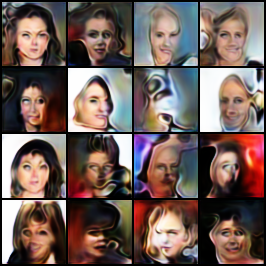

In [ ]:
transforms.ToPILImage()(make_grid(G(torch.randn(16,128,device=device)).detach().cpu(),normalize=True,nrow=4))

### The fourth task is to check model performance (3 pts)

1) Evaluate the FID metric for your model (3 pts)

Do not forget to use materials shared on seminars!

In [ ]:
fid = FID(normalize=True).to(device)

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:05<00:00, 18.8MB/s]


In [ ]:
for data in tqdm(dataloader):
  fid.update(data.to(device)/2+0.5,real=True)

100%|██████████| 3166/3166 [12:33<00:00,  4.20it/s]


In [ ]:
N = 20000
for i in tqdm(range(N//batch_size)):
  fid.update(G(torch.randn(batch_size,128,device=device))/2+0.5,real=False)

100%|██████████| 312/312 [01:53<00:00,  2.76it/s]


In [ ]:
fid.compute()

tensor(108.9904, device='cuda:0')

### The last task is to improve performance by correcting latent code sampling procedure (10 pts)

In this part you will implement I-SIR method to sample latent codes from corrected latent distribution and evaluate model performance with updated sampling using FID metric.

#### I-SIR (7 pts)

Algorithm:

* Sample $z \sim N(0,1)$ of shape $[N_s,1,n_z]$, where $n_z$ - size of latent space (128 for our model)

* FOR number of iterations $N_i$:
    * Sample additional particles $z_{\mathrm{add}} \sim N(0,1)$ of shape $[N_s,N_p,n_z]$
    * Concatenate $z$ with $z_{\mathrm{add}}$ along second dimension and reshape to the form $[-1,n_z]$. The result will be new $z$ of size $[N_s(N_p+1),n_z]$
    * Compute logarithm of density for new $z$ 
    
    $\log\rho(z) = -\frac{||z||_2^2}{2} + D(G(z))$ 
    
    and reshape result to the size $[N_s,N_p+1]$.
    * Make element-wise sampling from log density: fix first index and sample second one with respect to corresponding log density value (consider torch.distributions.Categorical). The result will be $idxs$ of size $[N_s]$.
    * Take particles according to sampled indexs $z = z[torch.arange(N_s),idxs]$.
* Return new samples $z$

#### Evaluate model using new sampling procedure (3 pts)

Compute FID metric by sampling latent code using I-SIR function. Leave a comment on obtained results.

In [ ]:
def I_SIR(N_i,N_s,N_p,n_z,D,G):
  z = torch.randn(N_s, 1, n_z).to(device)
  for i in range(N_i):
    z_add = torch.randn(N_s, N_p, n_z).to(device)
    z = torch.cat((z, z_add), 1).reshape((-1, n_z))

    dens_log = (-((torch.linalg.norm(z, dim=1))**2)/2) + D(G(z)).reshape(-1)
    dens_log = dens_log.reshape((N_s, N_p + 1))

    idxs = []
    for j in range(dens_log.shape[0]):
      idxs.append(torch.distributions.categorical.Categorical(logits = dens_log[j, :]).sample())
    z = z.reshape((N_s, N_p + 1, n_z))
    z = z[torch.arange(N_s), idxs]
    z = z.reshape(N_s, 1, n_z)
  return z

In [ ]:
fid_s = FID(normalize=True).to(device)

In [ ]:
for data in tqdm(dataloader):
  fid_s.update(data.to(device)/2+0.5,real=True)

100%|██████████| 3166/3166 [12:34<00:00,  4.20it/s]


In [ ]:
torch.cuda.empty_cache()

In [ ]:
N = 20000
for i in tqdm(range(N//batch_size)):
  fid_s.update(G(I_SIR(N_i = 2, N_s = batch_size, N_p = 2, n_z = 128, D = D, G = G))/2+0.5, real = False)

100%|██████████| 312/312 [06:39<00:00,  1.28s/it]


In [ ]:
fid_s.compute()

tensor(110.3624, device='cuda:0')

Results are not so good because I run only 1000 iterations. More iterations leads to reconnecting GPU in Colab :(
Obtained FID for my model and model with I_SIR function are almost the same. More likely this is because of the small number of iterations.